<a href="https://colab.research.google.com/github/AHamamd150/Zewail-city/blob/main/Gradiant_decent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns

In [53]:
x=np.random.randint(1,20,500)
y = np.log(x)


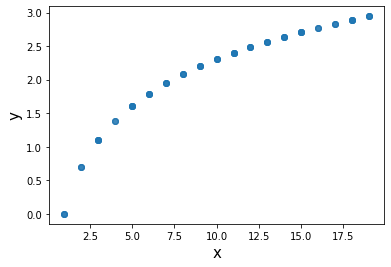

In [54]:
plt.scatter(x,y,alpha=0.1);
plt.xlabel('x',fontsize=15);
plt.ylabel('y',fontsize=15);

In [56]:
def Grad(x,y,lr,it):
  n = len(x)
  B0=B =0
  mse,se,b0,b=[],[],[],[]
  for i in range(it):
      y_pred= B0 + B *x 
      MSE= 1/n*sum([error**2 for error in (y-y_pred)])
      SE= 1/n*sum([error for error in (y-y_pred)])
      MB0 = -2/n*sum(y- y_pred)
      MB = -2/n*sum(x*(y- y_pred))
      B0 = B0 - MB0*lr
      B = B - MB*lr
      mse.append(MSE)
      se.append(abs(SE))
      b0.append(B0)
      b.append(B)
      #print('Bias= {:.5f}  ,B={:.5f}, MSE= {:.5f}'.format(B0,B,MSE))
  return mse,b0,b,se    

In [62]:
mse1,b01,b1,se1=Grad(x,y,0.002,15)
mse2,b02,b2,se2=Grad(x,y,0.006,15)
mse3,b03,b3,se3=Grad(x,y,0.007,15)

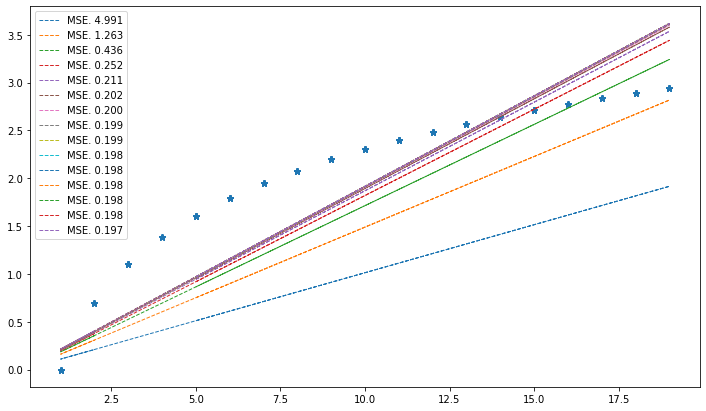

In [64]:
plt.figure(figsize=(12,7))
plt.scatter(x,y,marker='*')
yff=b01[-1]+b1[-1]*x
yfft=1/(1+math.e**(-yff))
for i in range(15):
  plt.plot(x,(b01[i]+b1[i]*x),'--',label='MSE. {:.3f}'.format(mse1[i]),linewidth=1)
plt.legend(loc='best');



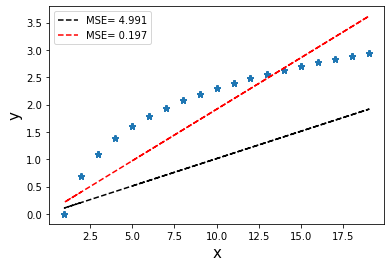

In [65]:
plt.plot(x,(b01[0]+b1[0]*x),'k--',label='MSE= {:.3f}'.format(mse1[0]));
plt.plot(x,(b01[-1]+b1[-1]*x),'r--',label='MSE= {:.3f}'.format(mse1[-1]));
plt.scatter(x,y,marker='*');
plt.xlabel('x',fontsize=15);
plt.ylabel('y',fontsize=15);
plt.legend(loc='best');


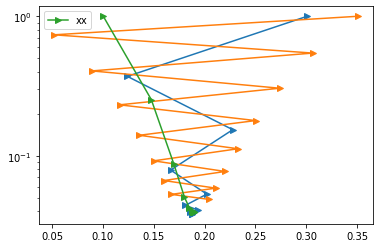

In [67]:
plt.plot(b2,np.array(mse2)/np.array(mse2).max(),'>-');
plt.plot(b3,np.array(mse3)/np.array(mse3).max(),'>-');
plt.plot(b1,np.array(mse1)/np.array(mse1).max(),'>-',label='xx');

plt.legend();
plt.yscale('log')


In [68]:
from mpl_toolkits import mplot3d



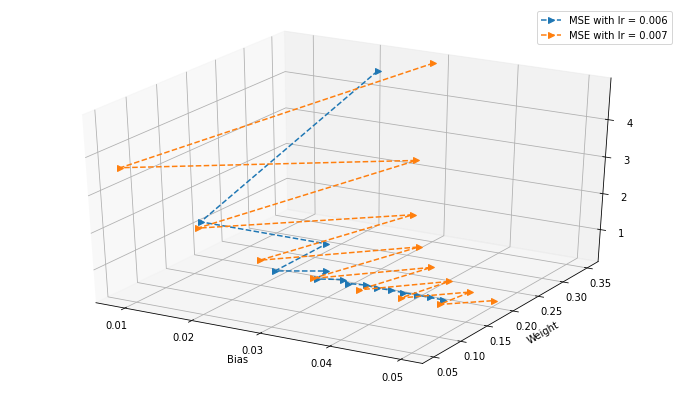

In [78]:
fig= plt.figure(figsize=(12,7))
ax = plt.axes(projection='3d');
ax.plot3D(b02,b2,mse2,'-->',label='MSE with lr = 0.006');
#ax.plot3D(b01,b1,mse1,linewidth=1);
ax.plot3D(b03,b3,mse3,'-->',label='MSE with lr = 0.007');
plt.xlabel('Bias');
plt.ylabel('Weight');
plt.legend(loc='best');



# Binary data sets

In [79]:
def sigmoid(a,b,x):
  l=a+b*x
  return 1/(1+np.exp(-l))

In [80]:
X = np.array([-10,-8,-5.5,-1.1,-1,0.5,8,6.2,8.5,9,10])
Y =np.array([0.01,0.02,0.05,0.01,0.01,0.9,0.98,0.9,1,1,0.9])

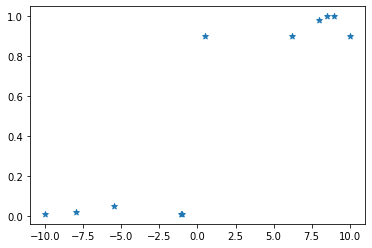

In [81]:
plt.scatter(X,Y,marker='*');


In [82]:
MSE1,B01,B1,SE1=Grad(X,Y,0.002,50)
MSE2,B02,B2,SE2=Grad(X,Y,0.006,50)
MSE3,B03,B3,SE3=Grad(X,Y,0.007,50)

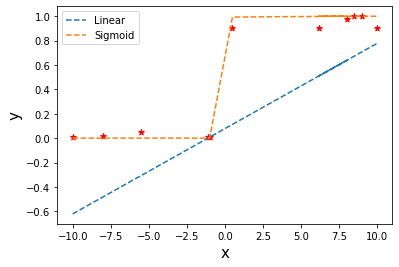

In [83]:
plt.plot(X,(B01[-1]+B1[-1]*X),'--',label='Linear');
plt.plot(X,sigmoid(0,10,X),'--',label='Sigmoid');
plt.scatter(X,Y,marker='*',c='r');
plt.xlabel('x',fontsize=15);
plt.ylabel('y',fontsize=15);
plt.legend(loc='best');


In [84]:
def Grad_Logestic(x,y,lr,it):
  n = len(x)
  B0=B =0
  Cost,b0,b=[],[],[]
  for i in range(it):
      y_hat= sigmoid(B0 , B ,x) 
      cost= -1/n*sum([error for error in (y*np.log(y_hat)+(1-y)*np.log(1-y_hat))])
      
      MB0 = -2/n*sum(y- y_hat)
      MB = -2/n*sum(x*(y- y_hat))
      B0 = B0 - MB0*lr
      B = B - MB*lr
      Cost.append(cost)  
      b0.append(B0)
      b.append(B)
      #print('Bias= {:.5f}  ,B={:.5f}, MSE= {:.5f}'.format(B0,B,cost))
  return Cost,b0,b  

In [85]:
cost_log1,theta01,theta1=Grad_Logestic(X,Y,0.01,10)
cost_log2,theta02,theta2=Grad_Logestic(X,Y,0.1,10)
cost_log3,theta03,theta3=Grad_Logestic(X,Y,0.6,10)

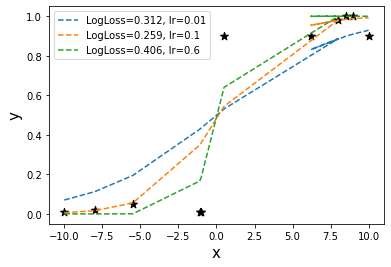

In [87]:
#plt.plot(X,(B01[-1]+B1[-1]*X),'--',label='Linear');
plt.plot(X,sigmoid(theta01[-1],theta1[-1],X),'--',label='LogLoss={:.3f}, lr=0.01'.format(cost_log1[-1]));
plt.plot(X,sigmoid(theta02[-1],theta2[-1],X),'--',label='LogLoss={:.3f}, lr=0.1'.format(cost_log2[-1]));
plt.plot(X,sigmoid(theta03[-1],theta3[-1],X),'--',label='LogLoss={:.3f}, lr=0.6'.format(cost_log3[-1]));

plt.scatter(X,Y,marker='*',c='k',s=70);
plt.xlabel('x',fontsize=15);
plt.ylabel('y',fontsize=15);
plt.legend(loc='best');

#Antoher example
Based on https://www.tensorflow.org/tutorials/keras/regression

In [22]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [23]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import layers

In [24]:
dataset = raw_dataset.copy()
dataset = dataset.dropna()


In [5]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

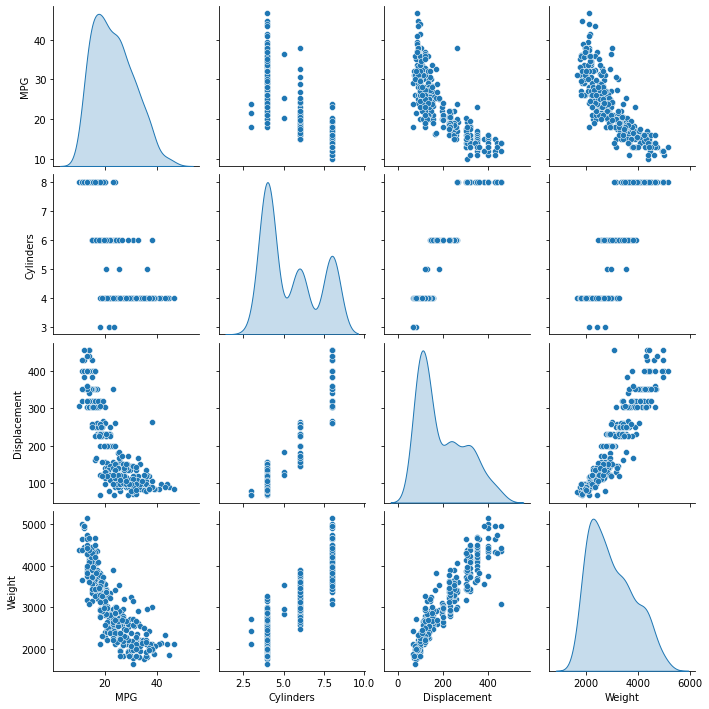

In [6]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde');


In [7]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [25]:
horsepower = np.array(train_features['Horsepower'])
horsepower_normalizer = layers.Normalization(input_shape=[1,], axis=None)
horsepower_normalizer.adapt(horsepower)

In [26]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1)
])



In [45]:
horsepower_model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.1),
    loss='MSE')

In [46]:
history = horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,   
    verbose=1,
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 1s 43ms/step - loss: 25.6449 - mse: 25.6449 - val_loss: 23.7533 - val_mse: 23.7533
Epoch 2/100
8/8 [==============================] - 0s 11ms/step - loss: 25.1629 - mse: 25.1629 - val_loss: 23.6901 - val_mse: 23.6901
Epoch 3/100
8/8 [==============================] - 0s 11ms/step - loss: 25.1864 - mse: 25.1864 - val_loss: 23.7772 - val_mse: 23.7772
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 25.2194 - mse: 25.2194 - val_loss: 23.8950 - val_mse: 23.8950
Epoch 5/100
8/8 [==============================] - 0s 11ms/step - loss: 25.2363 - mse: 25.2363 - val_loss: 23.7843 - val_mse: 23.7843
Epoch 6/100
8/8 [==============================] - 0s 12ms/step - loss: 25.5878 - mse: 25.5878 - val_loss: 24.1053 - val_mse: 24.1053
Epoch 7/100
8/8 [==============================] - 0s 11ms/step - loss: 25.2053 - mse: 25.2053 - val_loss: 23.6814 - val_mse: 23.6814
Epoch 8/100
8/8 [==============================] - 0s 14ms/step

Text(0.5, 0, 'epoch')

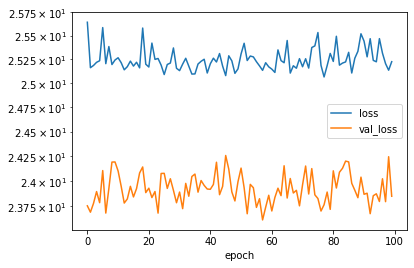

In [47]:
hist = pd.DataFrame(history.history)
plt.plot(history.history['loss'], label='loss');
plt.plot(history.history['val_loss'], label='val_loss');
plt.legend();
plt.yscale('log');
plt.xlabel('epoch');

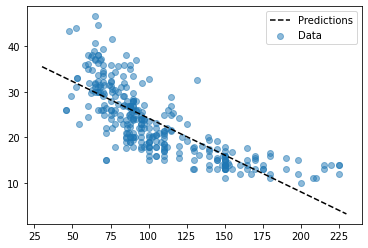

In [66]:
x = tf.linspace(30.0, 230, 251)
y = horsepower_model.predict(x);
plt.scatter(train_features['Horsepower'], train_labels, label='Data',alpha=0.5)
plt.plot(x, y,'k--',  label='Predictions');
plt.legend();

# Fit with DNN model

In [48]:
model_DNN = keras.Sequential([
      horsepower_normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

model_DNN.compile(loss='mse',
                optimizer=tf.keras.optimizers.SGD(0.001))

In [49]:
history_DNN = model_DNN.fit(
    train_features['Horsepower'],
    train_labels,
    epochs=100,
    verbose=1,
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 1s 25ms/step - loss: 577.9211 - val_loss: 576.0612
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 521.4084 - val_loss: 488.7797
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 392.7802 - val_loss: 268.4104
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 136.7741 - val_loss: 37.1580
Epoch 5/100
8/8 [==============================] - 0s 9ms/step - loss: 26.0029 - val_loss: 25.8208
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 21.7753 - val_loss: 24.3851
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 21.1422 - val_loss: 24.4504
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 20.9634 - val_loss: 23.2914
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 20.5127 - val_loss: 23.2236
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 20.3911 - val_loss: 23.0103
E

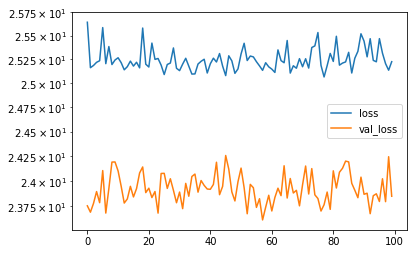

In [50]:
hist = pd.DataFrame(history_DNN.history)
plt.plot(history.history['loss'], label='loss');
plt.plot(history.history['val_loss'], label='val_loss');
plt.legend();
plt.yscale('log')

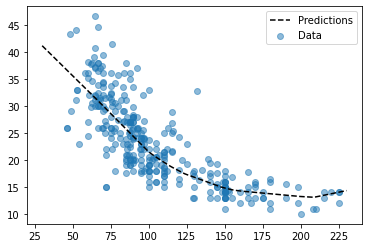

In [69]:
x = tf.linspace(30, 230, 251)
y = model_DNN.predict(x);
plt.scatter(train_features['Horsepower'], train_labels, label='Data',alpha=0.5)
plt.plot(x, y,'k--',  label='Predictions');
plt.legend();